### 1. Import Relevant Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer, MinMaxScaler
from sklearn.model_selection import train_test_split

### 2. Load the Data

In [2]:
# Load dataset from a CSV file.
wqi = pd.read_csv('wqi_after_eda.csv')

### 3. Exploring the Data

In [3]:
# Look at the dimensions of the dataset. 
wqi.shape

(1025, 14)

In [4]:
# Display the first few rows of the DataFrame (wqi).
wqi.head()

,Station_no,Date,Cond (μS/cm),DO (mg/L),pH,NO2 (mg/L),NO3 (mg/L),TN (mg/L),TP (mg/L),TSS (mg/L),BOD (mg/L),Turbidity (NTU),WQI,Water Quality Classification
0,242,2019-10-03,23.85,6.72,7.85,0.1,0.1,0.7,0.1,5.5,2.0,1.7,36.042485,Good (3)
1,242,2019-10-03,25.01,6.36,7.81,0.1,0.1,0.8,0.1,6.0,2.0,1.7,36.878936,Good (3)
2,242,2019-10-03,25.29,6.36,7.80,0.1,0.1,0.8,0.1,6.5,2.0,2.7,39.179552,Good (3)
3,350,2019-10-03,19.94,6.50,7.81,0.1,0.1,0.8,0.1,6.0,2.0,1.7,36.759645,Good (3)
4,350,2019-10-03,20.11,6.47,7.82,0.1,0.1,0.8,0.1,6.0,2.0,1.9,37.212797,Good (3)


In [5]:
# Display the names of all the columns in the DataFrame (wqi).
wqi.columns

Index(['Station_no', 'Date', 'Cond (μS/cm)', 'DO (mg/L)', 'pH', 'NO2 (mg/L)',
       'NO3 (mg/L)', 'TN (mg/L)', 'TP (mg/L)', 'TSS (mg/L)', 'BOD (mg/L)',
       'Turbidity (NTU)', 'WQI', 'Water Quality Classification'],
      dtype='object')

In [6]:
# Get information about the columns, data types, and the presence of missing values.
wqi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Station_no                    1025 non-null   int64  
 1   Date                          1025 non-null   object 
 2   Cond (μS/cm)                  1025 non-null   float64
 3   DO (mg/L)                     1025 non-null   float64
 4   pH                            1025 non-null   float64
 5   NO2 (mg/L)                    1025 non-null   float64
 6   NO3 (mg/L)                    1025 non-null   float64
 7   TN (mg/L)                     1025 non-null   float64
 8   TP (mg/L)                     1025 non-null   float64
 9   TSS (mg/L)                    1025 non-null   float64
 10  BOD (mg/L)                    1025 non-null   float64
 11  Turbidity (NTU)               1025 non-null   float64
 12  WQI                           1025 non-null   float64
 13  Wat

There are no missing values in the dataset. Most of the data are numeric except for the 'Date' and 'Water Quality Classification' columns. 'Date' column in the dataset is currently stored as an object data type, which typically indicates that it's being treated as a string. Converting the 'Date' column to datetime format will enable us to perform time-based analysis and modeling if needed.

In [7]:
# Convert the 'Date' column to datetime format.
wqi['Date'] = pd.to_datetime(wqi['Date'])

In [8]:
# Display the data types of each column in the DataFrame (wqi).
wqi.dtypes

Station_no                               int64
Date                            datetime64[ns]
Cond (μS/cm)                           float64
DO (mg/L)                              float64
pH                                     float64
NO2 (mg/L)                             float64
NO3 (mg/L)                             float64
TN (mg/L)                              float64
TP (mg/L)                              float64
TSS (mg/L)                             float64
BOD (mg/L)                             float64
Turbidity (NTU)                        float64
WQI                                    float64
Water Quality Classification            object
dtype: object

### 4. Create Dummy Features for Categorical Variables

In [9]:
# Convert categorical variable, 'Water Quality Classificaion', into a binary columns using one-hot encoding.
dummy = pd.get_dummies(wqi['Water Quality Classification'], prefix='WQC')
dummy.head()

,WQC_Excellent (4),WQC_Good (3),WQC_Poor (2),WQC_Unfit for consumption (0),WQC_Very Poor (1)
0,False,True,False,False,False
1,False,True,False,False,False
2,False,True,False,False,False
3,False,True,False,False,False
4,False,True,False,False,False


In [10]:
# Concatenate the original DataFrame (wqi) with the dummy DataFrame (dummy)
wqi = pd.concat([wqi, dummy], axis=1)
wqi.head()

,Station_no,Date,Cond (μS/cm),DO (mg/L),pH,NO2 (mg/L),NO3 (mg/L),TN (mg/L),TP (mg/L),TSS (mg/L),BOD (mg/L),Turbidity (NTU),WQI,Water Quality Classification,WQC_Excellent (4),WQC_Good (3),WQC_Poor (2),WQC_Unfit for consumption (0),WQC_Very Poor (1)
0,242,2019-10-03,23.85,6.72,7.85,0.1,0.1,0.7,0.1,5.5,2.0,1.7,36.042485,Good (3),False,True,False,False,False
1,242,2019-10-03,25.01,6.36,7.81,0.1,0.1,0.8,0.1,6.0,2.0,1.7,36.878936,Good (3),False,True,False,False,False
2,242,2019-10-03,25.29,6.36,7.80,0.1,0.1,0.8,0.1,6.5,2.0,2.7,39.179552,Good (3),False,True,False,False,False
3,350,2019-10-03,19.94,6.50,7.81,0.1,0.1,0.8,0.1,6.0,2.0,1.7,36.759645,Good (3),False,True,False,False,False
4,350,2019-10-03,20.11,6.47,7.82,0.1,0.1,0.8,0.1,6.0,2.0,1.9,37.212797,Good (3),False,True,False,False,False


#### 4.1 Examining the feature distributions

Examining the feature distributions before power transformation and scaling can be a useful step in our data preprocessing. If our data is heavily skewed or has outliers, we may consider applying power transformations to make the distribution more symmetrical or to reduce the impact of outliers.

/Users/aysebusra/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/aysebusra/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/aysebusra/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/aysebusra/anaconda3/lib/python3.11/site-packages/seaborn/_oldc

/Users/aysebusra/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/aysebusra/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/aysebusra/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/aysebusra/anaco

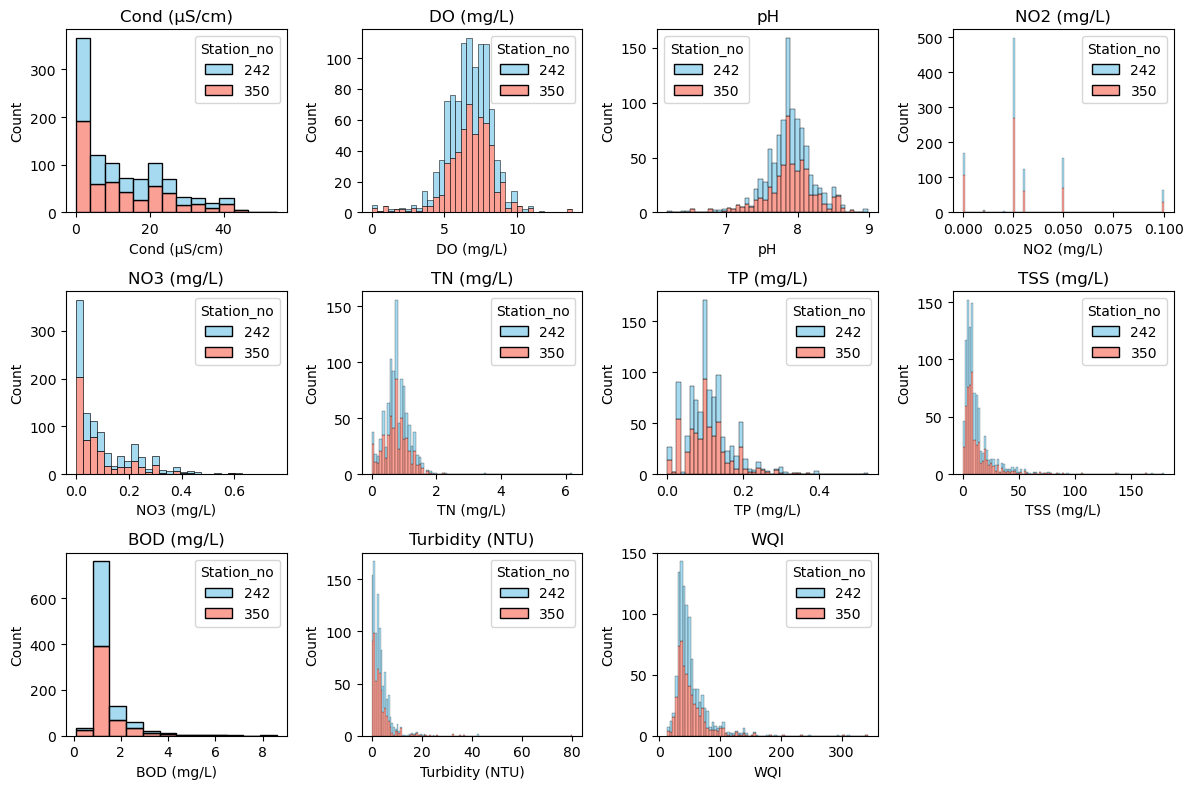

In [11]:
# Filter data by station numbers 242 and 350
filtered_data = wqi[wqi['Station_no'].isin([242, 350])]

# List of numerical columns
numerical_columns = ['Cond (μS/cm)', 'DO (mg/L)', 'pH', 'NO2 (mg/L)', 
                     'NO3 (mg/L)', 'TN (mg/L)', 'TP (mg/L)', 'TSS (mg/L)', 
                     'BOD (mg/L)', 'Turbidity (NTU)', 'WQI']

# Plot histograms for numerical features with hue as 'Station_no'
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns):
    plt.subplot(3, 4, i + 1)
    sns.histplot(data=filtered_data, x=col, hue='Station_no', multiple='stack', palette = ['skyblue', 'salmon'])
    plt.title(col)
plt.tight_layout()
plt.show()

Based on the histogram results, the following observations were made:

Features such as Cond, NO3, TSS, BOD, and Turbidity exhibit skewed distributions. Conversely, DO, pH, TN, and TP demonstrate distributions closer to normal.

NO2 appears to have irregular sampling intervals, resulting in gaps between data points. For instance, some data are recorded at intervals of 0, 0.025, 0.050, and 0.1.

The scale of each feature varies, with DO measured in mg/L and Cond in μS/cm, contributing to differences in their value ranges. Some features have a narrow range, with closely clustered values, while others exhibit a wider spread, indicating greater variability.

Additionally, the central tendency of the features varies, with some showing higher average values than others.

Based on these observations, it is advisable to apply log transformation and standardization to all features. Log transformation helps address skewness and brings the data closer to a normal distribution, which is beneficial for linear modeling. Standardization ensures that all features are on the same scale, preventing any single feature from disproportionately influencing the model due to its larger magnitude.

### 5. Split into testing and training datasets

Adding a 'Month' column extracted from the 'Date' column can be helpful for time-series analysis or exploring seasonal patterns in our dataset. This allows us to analyze how water quality parameters vary by month. 

In [12]:
# Extracting the month from the 'Date' column
wqi['Month'] = wqi['Date'].dt.month

# Displaying the updated DataFrame
wqi.head()

,Station_no,Date,Cond (μS/cm),DO (mg/L),pH,NO2 (mg/L),NO3 (mg/L),TN (mg/L),TP (mg/L),TSS (mg/L),BOD (mg/L),Turbidity (NTU),WQI,Water Quality Classification,WQC_Excellent (4),WQC_Good (3),WQC_Poor (2),WQC_Unfit for consumption (0),WQC_Very Poor (1),Month
0,242,2019-10-03,23.85,6.72,7.85,0.1,0.1,0.7,0.1,5.5,2.0,1.7,36.042485,Good (3),False,True,False,False,False,10
1,242,2019-10-03,25.01,6.36,7.81,0.1,0.1,0.8,0.1,6.0,2.0,1.7,36.878936,Good (3),False,True,False,False,False,10
2,242,2019-10-03,25.29,6.36,7.80,0.1,0.1,0.8,0.1,6.5,2.0,2.7,39.179552,Good (3),False,True,False,False,False,10
3,350,2019-10-03,19.94,6.50,7.81,0.1,0.1,0.8,0.1,6.0,2.0,1.7,36.759645,Good (3),False,True,False,False,False,10
4,350,2019-10-03,20.11,6.47,7.82,0.1,0.1,0.8,0.1,6.0,2.0,1.9,37.212797,Good (3),False,True,False,False,False,10


In [13]:
# Define features
X = wqi[['Station_no', 'Cond (μS/cm)', 'DO (mg/L)', 'pH', 'NO2 (mg/L)', 'NO3 (mg/L)', 'TN (mg/L)', 'TP (mg/L)', 'TSS (mg/L)', 'BOD (mg/L)', 'Turbidity (NTU)', 'Month']]

# Target variable
y = wqi['WQI']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Display the shapes of the resulting datasets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(820, 12)
(205, 12)
(820,)
(205,)


In [14]:
# Convert arrays to dataframes
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df = pd.DataFrame(X_test, columns=X.columns)
y_train_df = pd.DataFrame(y_train, columns=['WQI'])
y_test_df = pd.DataFrame(y_test, columns=['WQI'])

# Display the first few rows of the training and testing dataframes
print("X_train:")
print(X_train_df.head())

print("\nX_test:")
print(X_test_df.head())

print("\ny_train:")
print(y_train_df.head())

print("\ny_test:")
print(y_test_df.head())

X_train:
   Station_no  Cond (μS/cm)  DO (mg/L)    pH  NO2 (mg/L)  NO3 (mg/L)  \
0         242         23.85       6.72  7.85         0.1         0.1   
1         242         25.01       6.36  7.81         0.1         0.1   
2         242         25.29       6.36  7.80         0.1         0.1   
3         350         19.94       6.50  7.81         0.1         0.1   
4         350         20.11       6.47  7.82         0.1         0.1   

   TN (mg/L)  TP (mg/L)  TSS (mg/L)  BOD (mg/L)  Turbidity (NTU)  Month  
0        0.7        0.1         5.5         2.0              1.7     10  
1        0.8        0.1         6.0         2.0              1.7     10  
2        0.8        0.1         6.5         2.0              2.7     10  
3        0.8        0.1         6.0         2.0              1.7     10  
4        0.8        0.1         6.0         2.0              1.9     10  

X_test:
     Station_no  Cond (μS/cm)  DO (mg/L)    pH  NO2 (mg/L)  NO3 (mg/L)  \
820         350         8.189  

### 6. Power Transformation and Scaling

In [15]:
# Extract numerical columns
numerical_columns = X_train_df.select_dtypes(include=['float64']).columns

# Initialize the PowerTransformer
pt = PowerTransformer()

# Fit and transform all numerical features in the training data
X_train_df[numerical_columns] = pt.fit_transform(X_train_df[numerical_columns])

# Transform the numerical features in the testing data
X_test_df[numerical_columns] = pt.transform(X_test_df[numerical_columns])

In [16]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform all numerical features in the training data
X_train_df[numerical_columns] = scaler.fit_transform(X_train_df[numerical_columns])

# Transform the numerical features in the testing data
X_test_df[numerical_columns] = scaler.transform(X_test_df[numerical_columns])

In [17]:
print("Transformed Training Data:")
print(X_train_df.head())

print("\nTransformed Testing Data:")
print(X_test_df.head())

Transformed Training Data:
   Station_no  Cond (μS/cm)  DO (mg/L)        pH  NO2 (mg/L)  NO3 (mg/L)  \
0         242      0.674642   0.368442  0.467423         1.0    0.560212   
1         242      0.690787   0.341866  0.452347         1.0    0.560212   
2         242      0.694614   0.341866  0.448612         1.0    0.560212   
3         350      0.616325   0.352127  0.452347         1.0    0.560212   
4         350      0.619001   0.349920  0.456095         1.0    0.560212   

   TN (mg/L)  TP (mg/L)  TSS (mg/L)  BOD (mg/L)  Turbidity (NTU)  Month  
0   0.274347   0.429003    0.375673     0.68142         0.286615     10  
1   0.303644   0.429003    0.390184     0.68142         0.286615     10  
2   0.303644   0.429003    0.403668     0.68142         0.368987     10  
3   0.303644   0.429003    0.390184     0.68142         0.286615     10  
4   0.303644   0.429003    0.390184     0.68142         0.305638     10  

Transformed Testing Data:
     Station_no  Cond (μS/cm)  DO (mg/L)     

/Users/aysebusra/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/aysebusra/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/aysebusra/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/aysebusra/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future

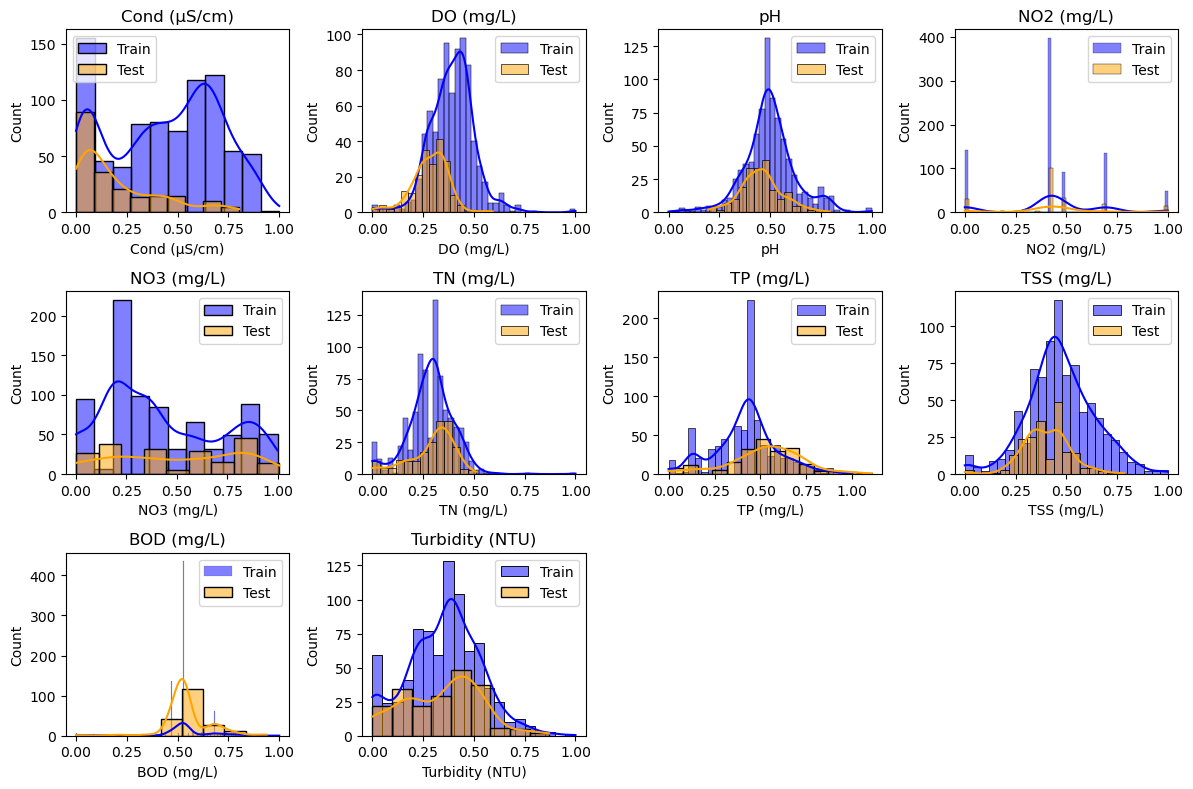

In [18]:
# Plot histograms for numerical features after scaling
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns):
    plt.subplot(3, 4, i + 1)
    sns.histplot(data=X_train_df, x=col, color='blue', label='Train', kde=True)
    sns.histplot(data=X_test_df, x=col, color='orange', label='Test', kde=True)
    plt.title(col)
    plt.legend()
plt.tight_layout()
plt.show()

After applying MinMaxScaler to the numerical features in the dataset, we observed that all parameters now exhibit distributions closer to a normal distribution. Additionally, the scaling process has successfully transformed the features to a consistent range between 0 and 1. 

### 6. Save the Train and Test Data

In [19]:
# Concatenate 'Station_no' and 'Month' columns to the transformed dataframes
X_train_df['Station_no'] = X_train['Station_no']
X_train_df['Month'] = X_train['Month']

X_test_df['Station_no'] = X_test['Station_no']
X_test_df['Month'] = X_test['Month']

In [20]:
# Save the transformed train and test data to CSV files
X_train_df.to_csv('X_train_transformed.csv', index=False)
X_test_df.to_csv('X_test_transformed.csv', index=False)

# Save the unchanged target variables to CSV files
y_train_df.to_csv('y_train.csv', index=False, header=['WQI'])
y_test_df.to_csv('y_test.csv', index=False, header=['WQI'])